#### Links

https://github.com/rapidsai/cuml
https://github.com/CannyLab/tsne-cuda

- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
- https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html
- https://distill.pub/2016/misread-tsne/

In [1]:
import os
import time
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

dataset_csv = open(os.path.join(os.getcwd(),'data', 'dataset_scaled.csv'), "r")
dep_list = []
target_list = []

with dataset_csv as f:
    for i in range(10626):
        line = f.readline()
        line = line.split(',')
        target = int(line[0])
        target_list.append(target)
        dep = line[1:]
        dep = np.array(dep, dtype='float64')
        dep_list.append(dep)

In [2]:
dep_list = np.array(dep_list)

In [18]:
print(dep_list.shape)
print(dep_list[0])
print(type(target_list[0]))

(10626, 400)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00114365 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0084571  0.00024356 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

In [6]:
np.random.seed(42)
tsne = TSNE(n_components=2, verbose=1, random_state=42, perplexity=10) 
# Try different values
# perplexity=
# learning_rate=

start_time = time.time()
dep_list_2d = tsne.fit_transform(dep_list)
print('t-SNE took', time.time()-start_time, 's')

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10626 samples in 0.007s...
[t-SNE] Computed neighbors for 10626 samples in 0.721s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10626
[t-SNE] Computed conditional probabilities for sample 2000 / 10626
[t-SNE] Computed conditional probabilities for sample 3000 / 10626
[t-SNE] Computed conditional probabilities for sample 4000 / 10626
[t-SNE] Computed conditional probabilities for sample 5000 / 10626
[t-SNE] Computed conditional probabilities for sample 6000 / 10626
[t-SNE] Computed conditional probabilities for sample 7000 / 10626
[t-SNE] Computed conditional probabilities for sample 8000 / 10626
[t-SNE] Computed conditional probabilities for sample 9000 / 10626
[t-SNE] Computed conditional probabilities for sample 10000 / 10626
[t-SNE] Computed conditional probabilities for sample 10626 / 10626
[t-SNE] Mean sigma: 8714.825149
[t-SNE] KL divergence after 250 iterations with early exaggeration: 97.661964
[t-SNE] 

In [7]:
deposit_df = pd.DataFrame()
deposit_df['tsne-2d-one'] = pd.DataFrame(dep_list_2d[:,0])
deposit_df['tsne-2d-two'] = pd.DataFrame(dep_list_2d[:,1])
deposit_df['target'] = pd.DataFrame(target_list)

In [21]:
deposit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10626 entries, 0 to 10625
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tsne-2d-one  10626 non-null  float32
 1   tsne-2d-two  10626 non-null  float32
 2   target       10626 non-null  int64  
dtypes: float32(2), int64(1)
memory usage: 166.2 KB


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

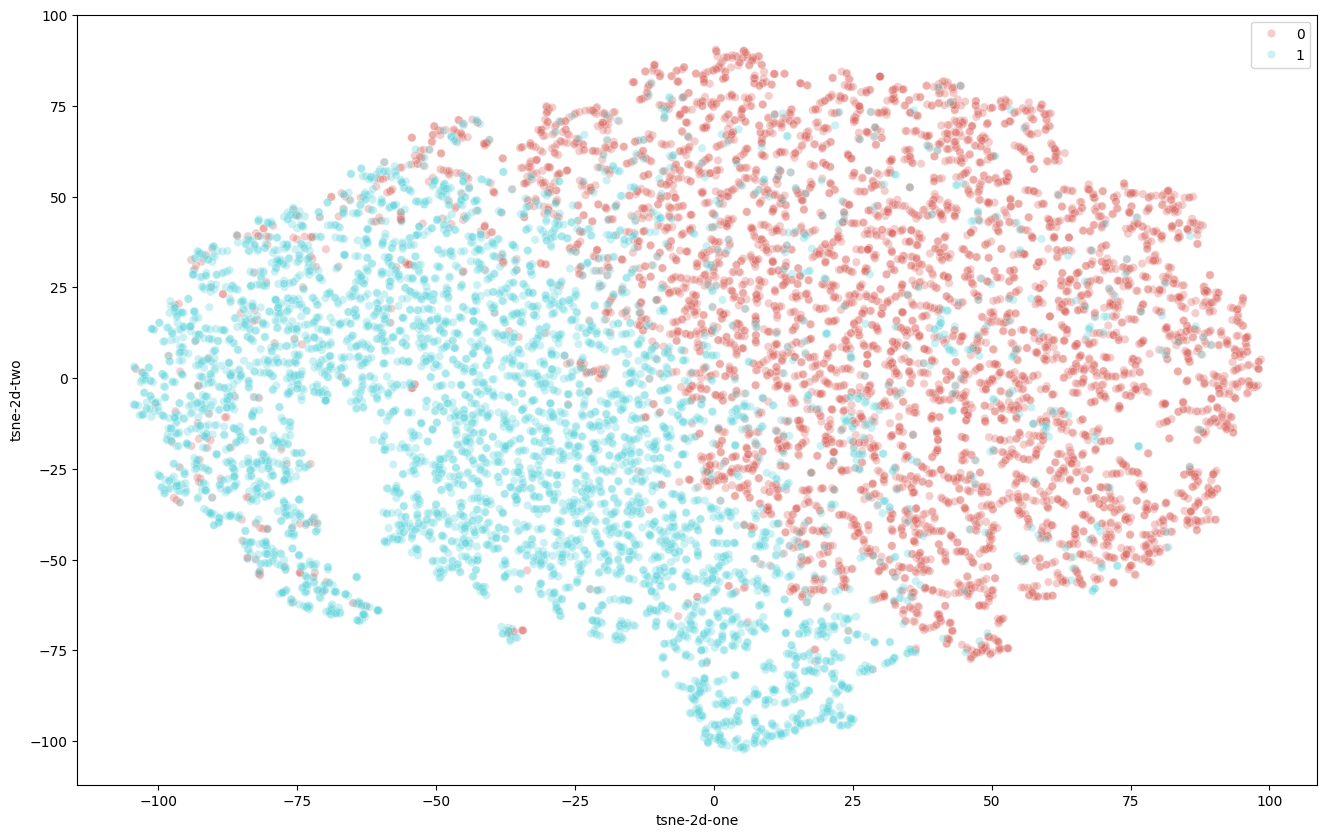

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 2),
    hue=target_list,
    data=deposit_df,
    legend="full",
    alpha=0.3
)